<https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/>

In [2]:
import pandas as pd
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
start = datetime.datetime(2015,1,1)
end = datetime.date.today()
apple = web.DataReader("AAPL", "yahoo", start, end)
type(apple)
apple.head()

Populating the interactive namespace from numpy and matplotlib


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600,105.158716
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500,102.196226
2015-01-06,106.540001,107.430000,104.629997,106.260002,65797100,102.205846
2015-01-07,107.199997,108.199997,106.699997,107.750000,40105900,103.638996
2015-01-08,109.230003,112.150002,108.699997,111.889999,59364500,107.621041


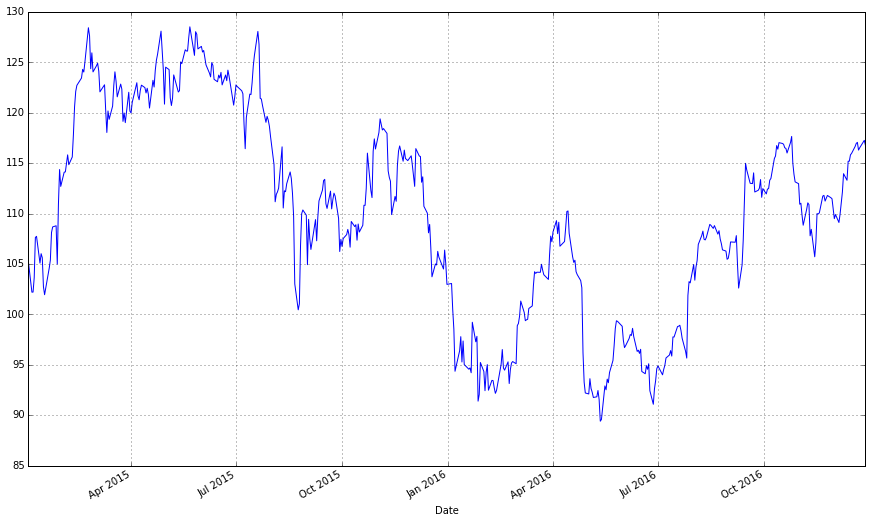

In [3]:
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


## candlestick charts

In [4]:
import pandaStock

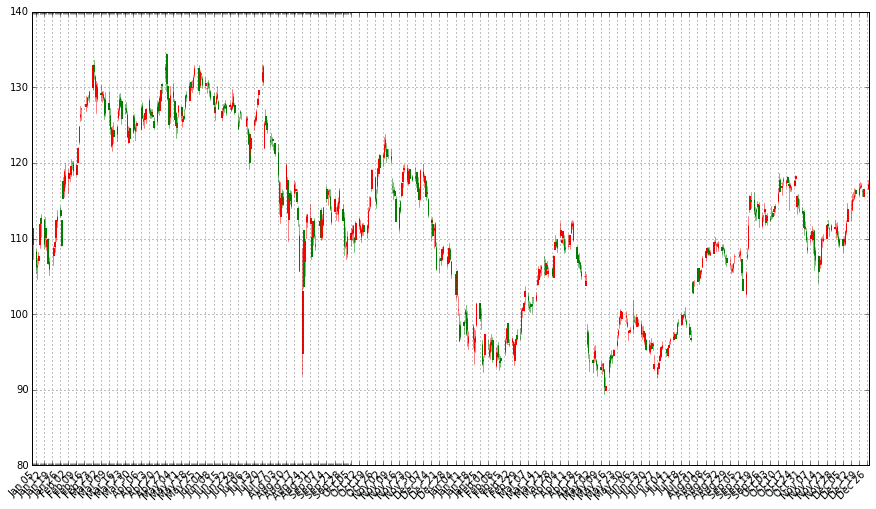

In [5]:
pandaStock.pandas_candlestick_ohlc(apple)

In [ ]:
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})
 
stocks.head()

In [ ]:
stocks.plot(grid = True)

In [ ]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)


## return series

In [ ]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

In [ ]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [ ]:
#\text{change}_t = \log(\text{price}_{t}) - \log(\text{price}_{t - 1}) 
import numpy as np
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

In [ ]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

## MA

In [16]:
reload (pandaStock)
apple = web.DataReader("AAPL", "yahoo", start, end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)#ma20
apple.head()

,Open,High,Low,Close,Volume,Adj Close,20d
Date,,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600,105.158716,NaN
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500,102.196226,NaN
2015-01-06,106.540001,107.430000,104.629997,106.260002,65797100,102.205846,NaN
2015-01-07,107.199997,108.199997,106.699997,107.750000,40105900,103.638996,NaN
2015-01-08,109.230003,112.150002,108.699997,111.889999,59364500,107.621041,NaN


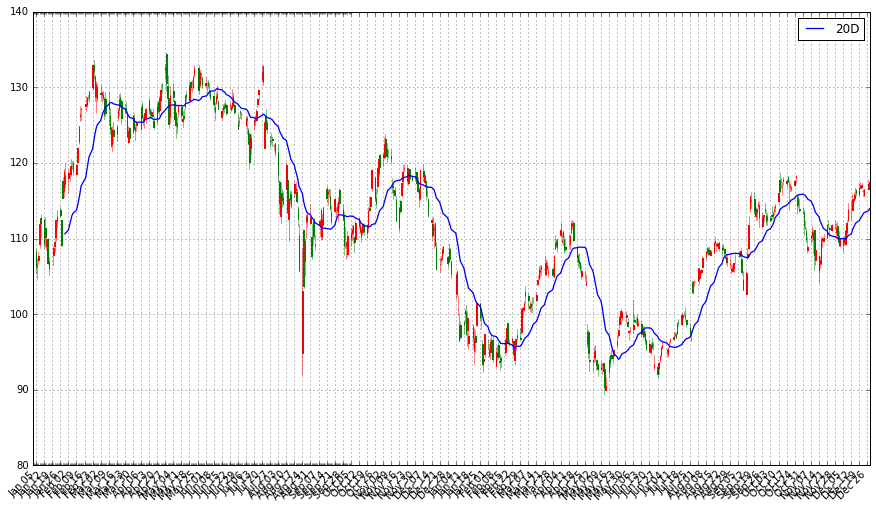

In [17]:
pandaStock.pandas_candlestick_ohlc(apple, otherseries = "20D")

In [18]:
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["120d"] = np.round(apple["Close"].rolling(window = 120, center = False).mean(), 2)

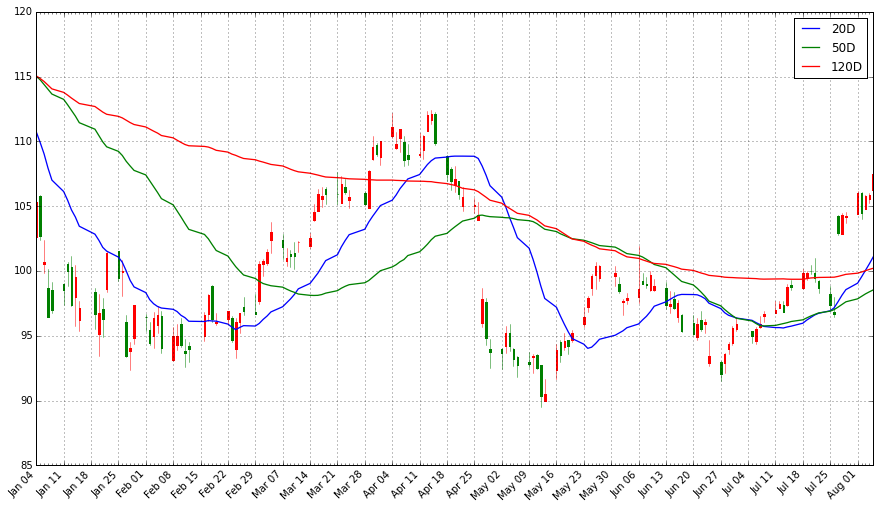

In [19]:
pandaStock.pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], 
                                   otherseries = ["20D", "50D", "120D"])

In [25]:
reload (ohlcvPlot)


<module 'ohlcvPlot' from 'ohlcvPlot.py'>

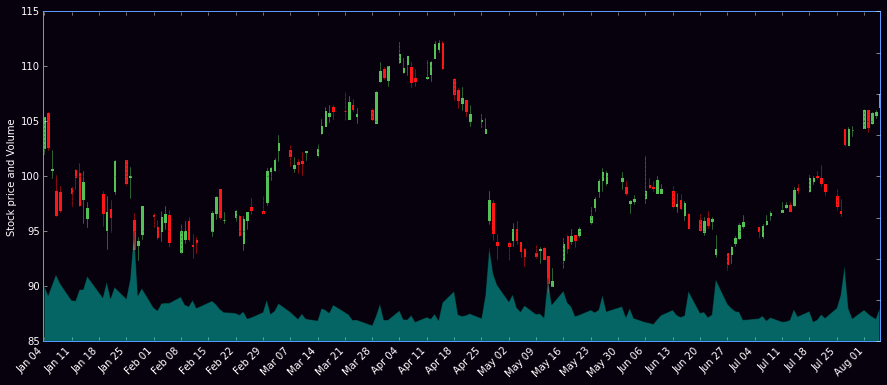

In [26]:
ohlcvPlot.pandas_candlestick_ohlcv(apple.loc['2016-01-04':'2016-08-07',:])